# JS05 - Klasterisasi Hierarki

## Praktikum

### Praktikum 1

Persiapan Lingkungan

In [1]:
try:
  import hdbscan
except ImportError:
  !pip install -q hdbscan
  import hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Langkah 2: Definisi Fungsi Visualisasi

In [2]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

Langkah 3: Membuat Dataset Sintetis

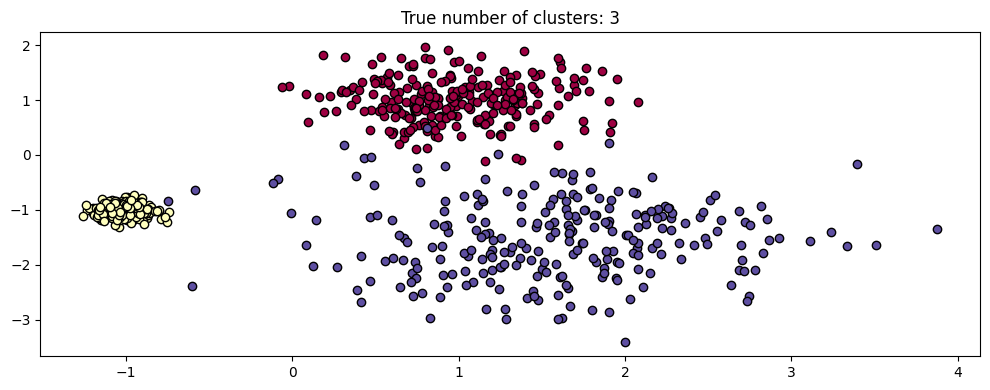

In [3]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

Langkah 4: Uji Scale Invariance pada DBSCAN

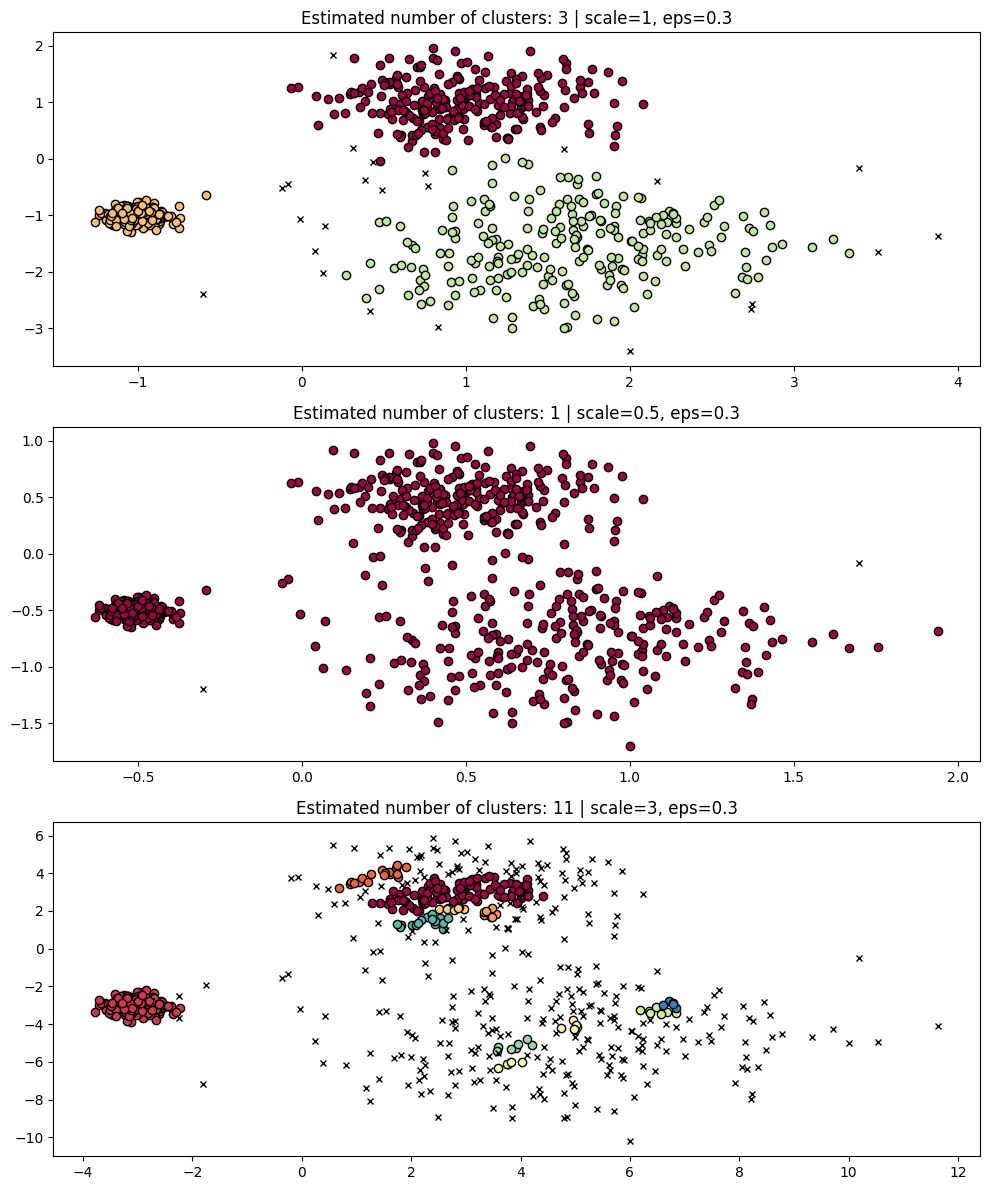

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

Perbaiki dengan mengubah eps sesuai skala:

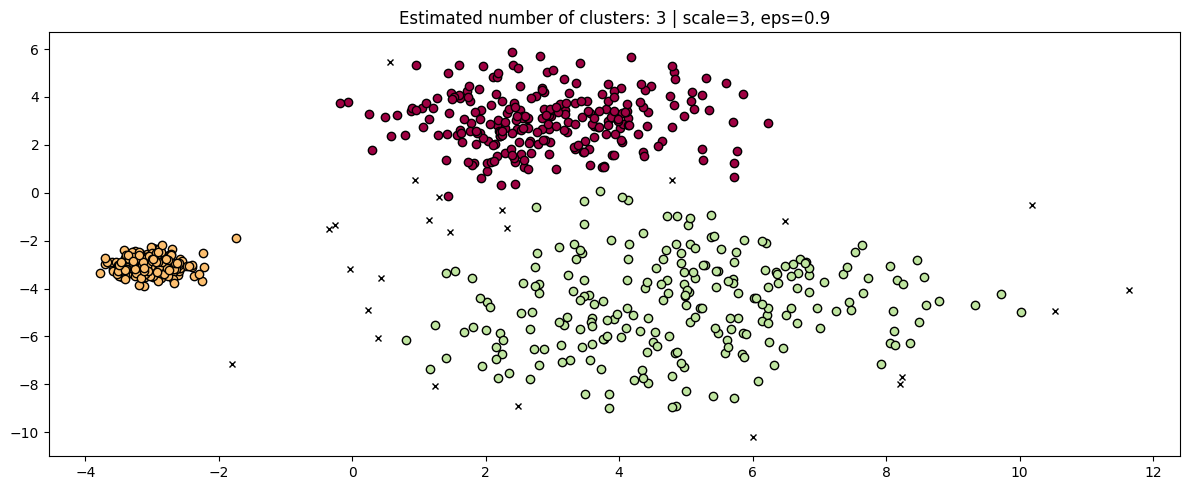

In [5]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

Langkah 5: Bandingkan dengan HDBSCAN (lebih robust)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

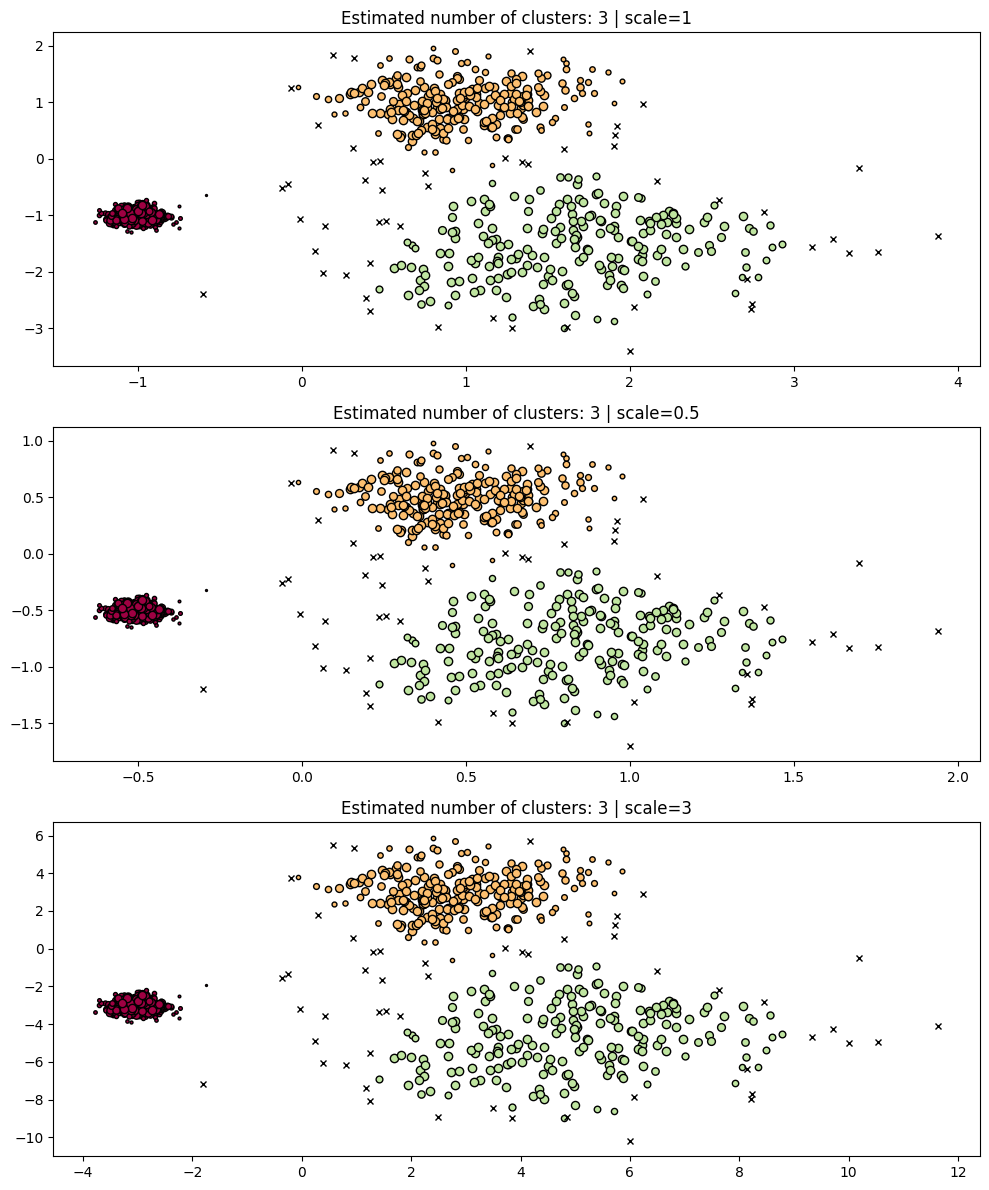

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

Langkah 6: Multi-Scale Clustering

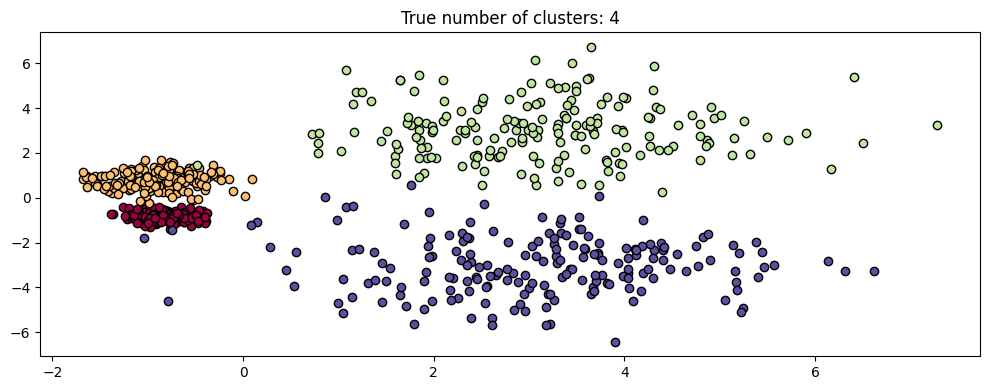

In [7]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

Bandingkan DBSCAN dengan eps berbeda:

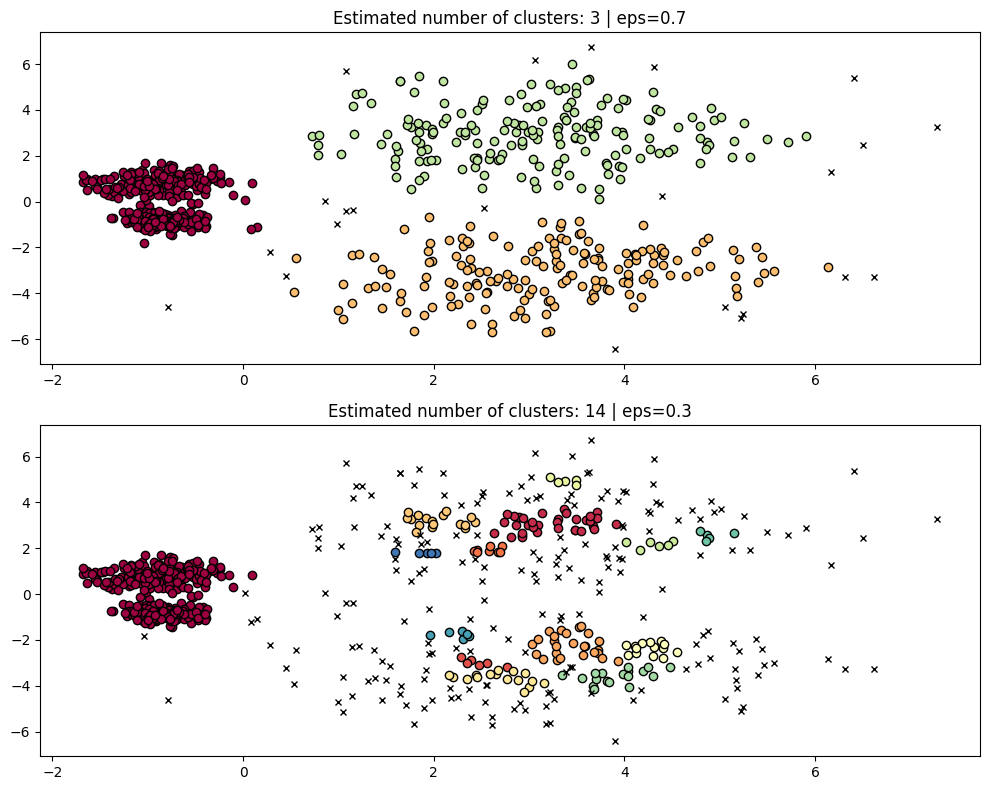

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

Jalankan HDBSCAN:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


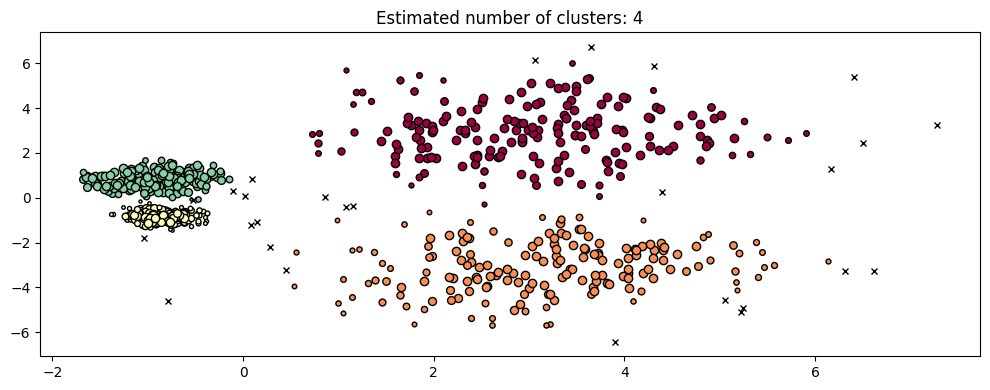

In [9]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

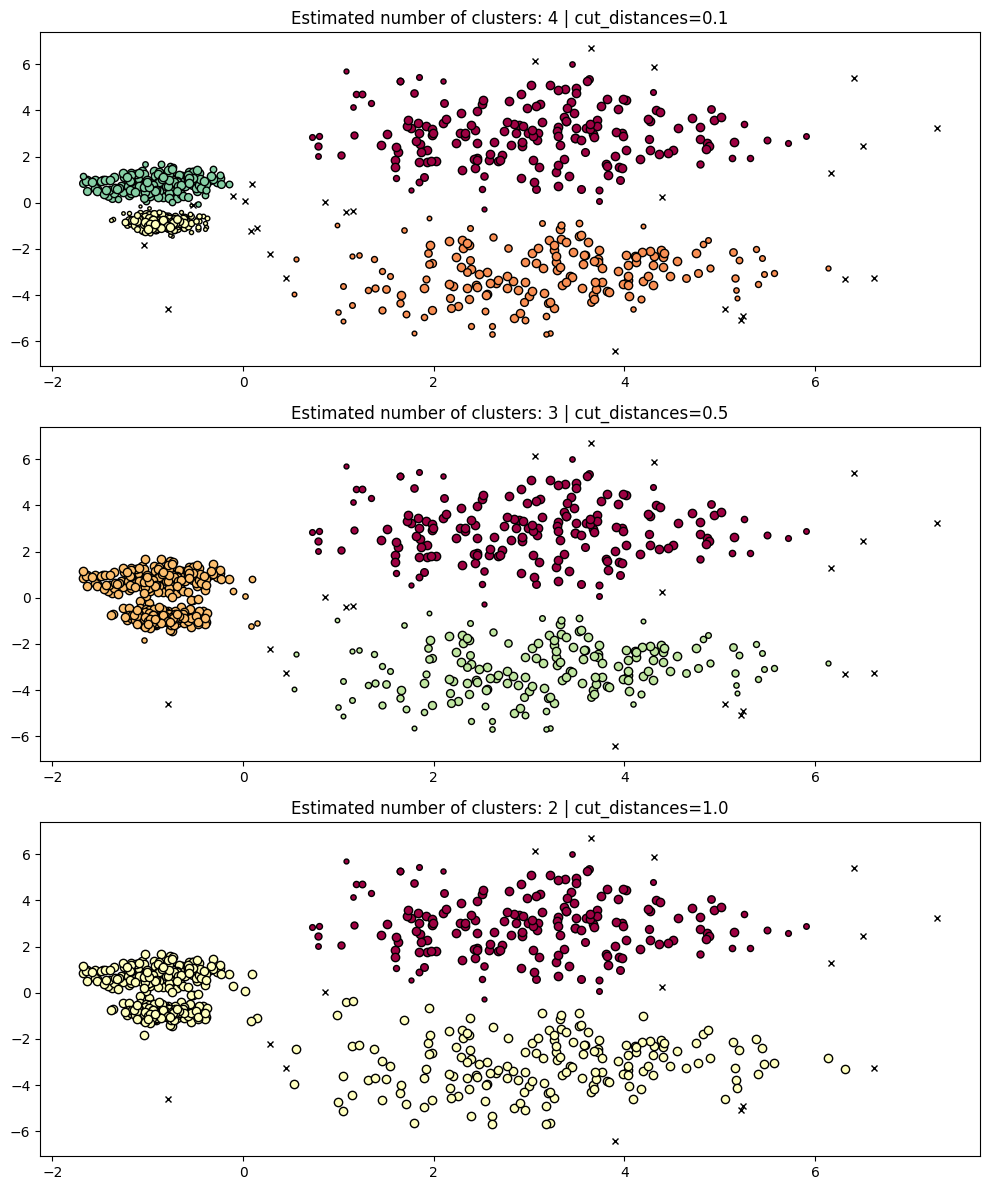

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
cut_distances = [0.1, 0.5, 1.0]

for idx, cut in enumerate(cut_distances):
    hdb = hdbscan.HDBSCAN(cluster_selection_epsilon=cut).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"cut_distances": cut})

plt.show()

### Praktikum 2

Langkah 7: Eksperimen Hyperparameter min_cluster_size

In [11]:
try:
  import hdbscan
except ImportError:
  !pip install -q hdbscan
  import hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

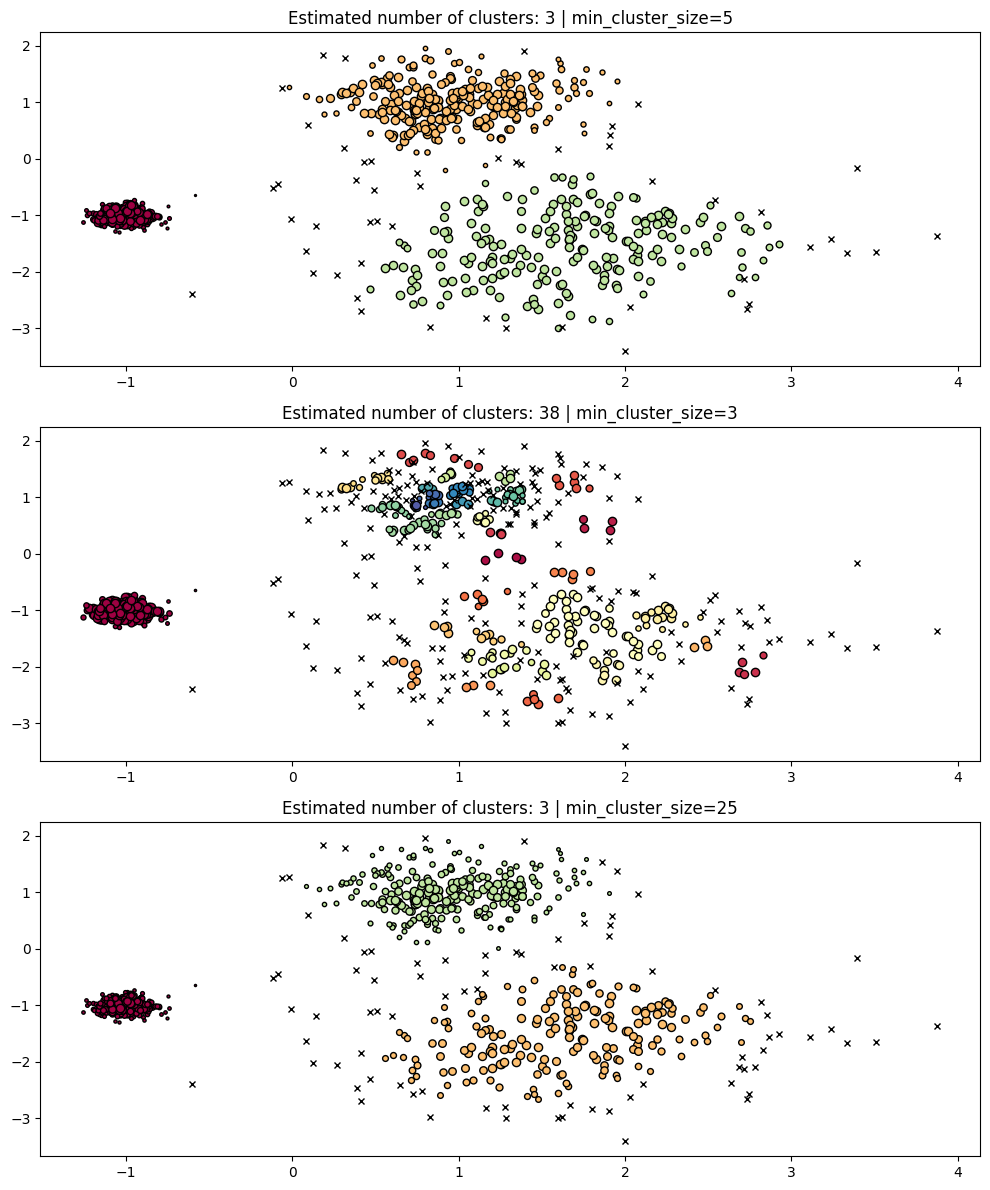

In [12]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Langkah 8: Eksperimen Hyperparameter min_samples

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

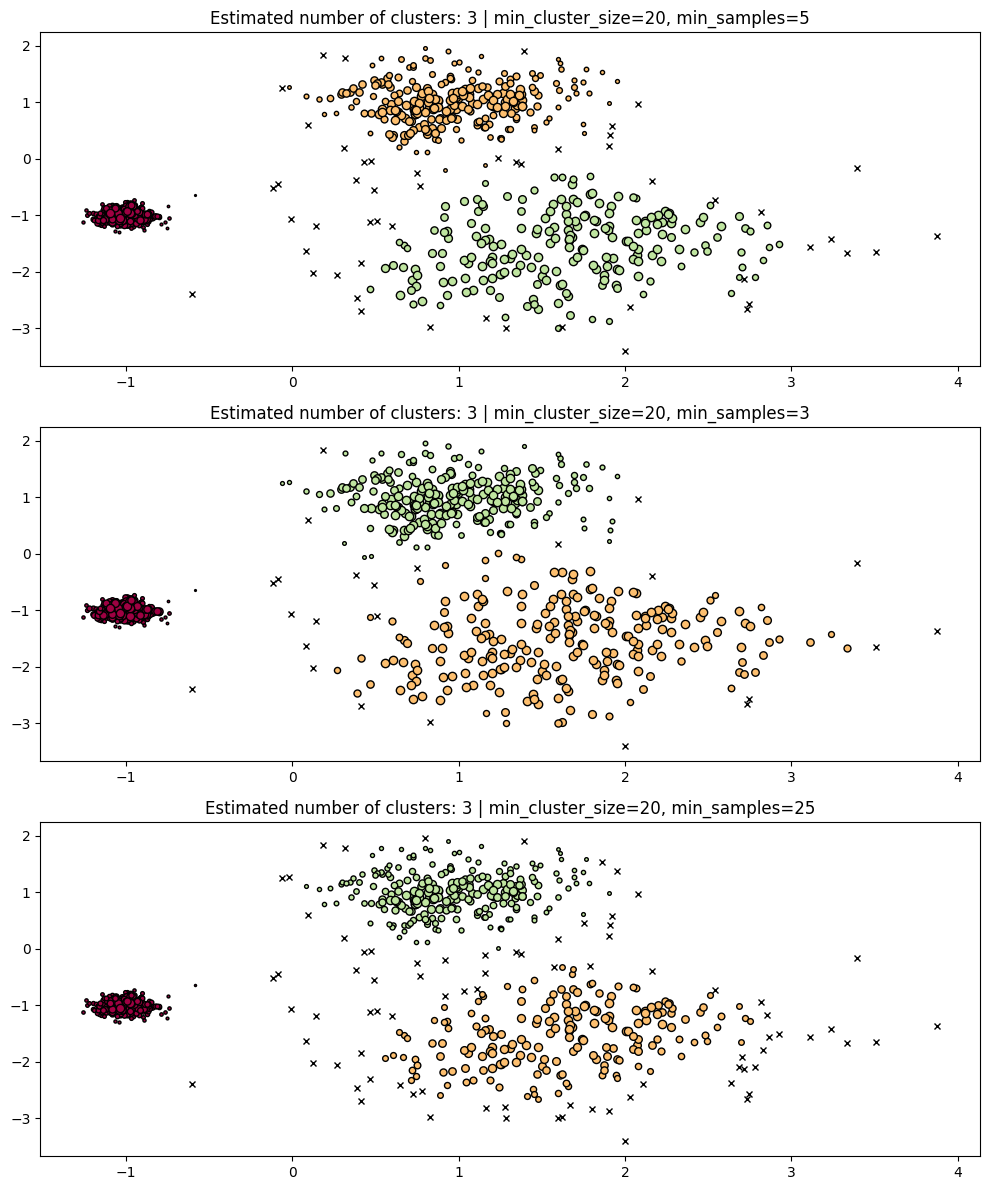

In [13]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


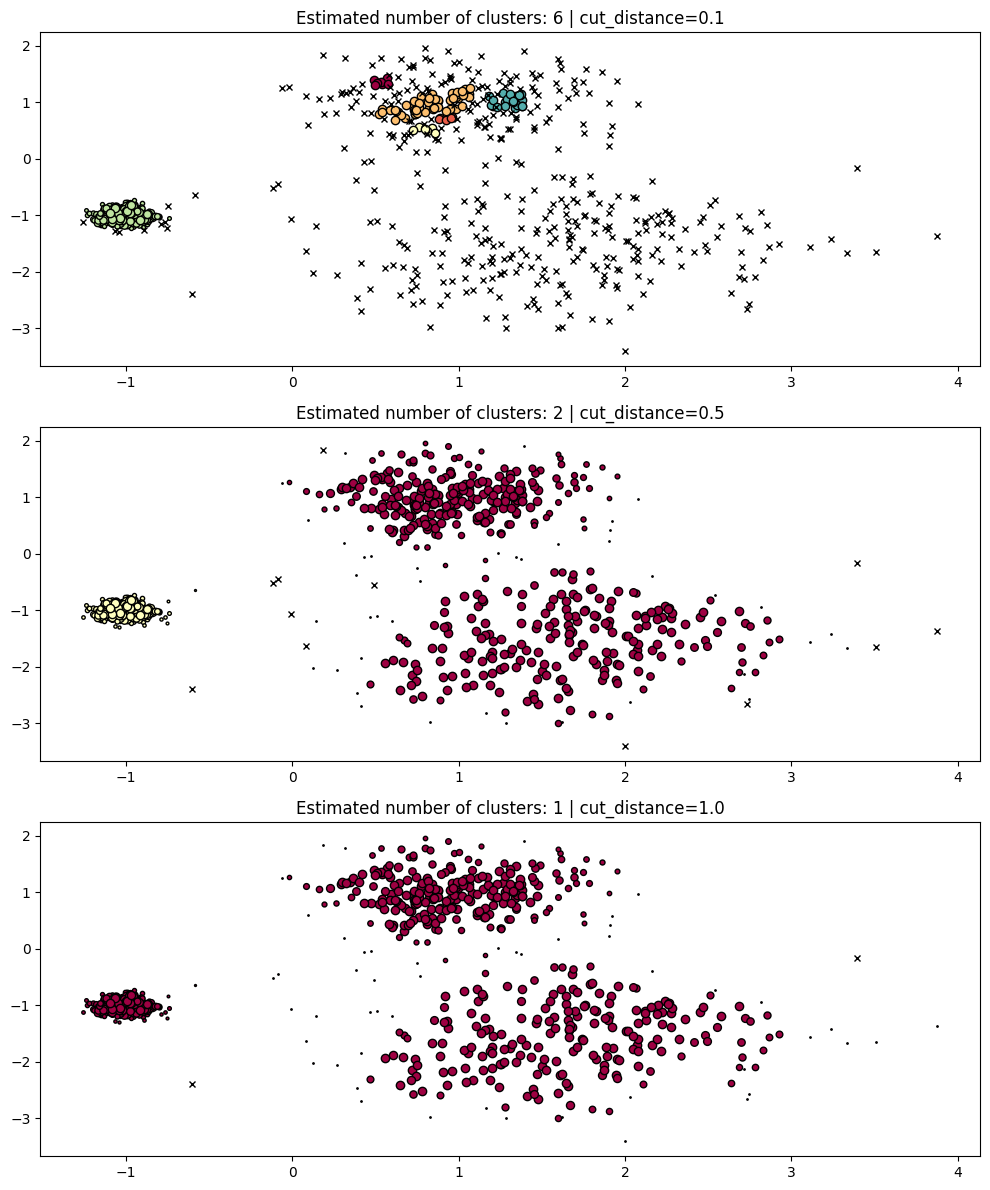

In [14]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

Langkah 10: Evaluasi dengan Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6451356578011034


Langkah 11: Evaluasi dengan Davies-Bouldin Index

In [16]:
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 2.1284499880816123


Langkah 12: Visualisasi Hasil Evaluasi

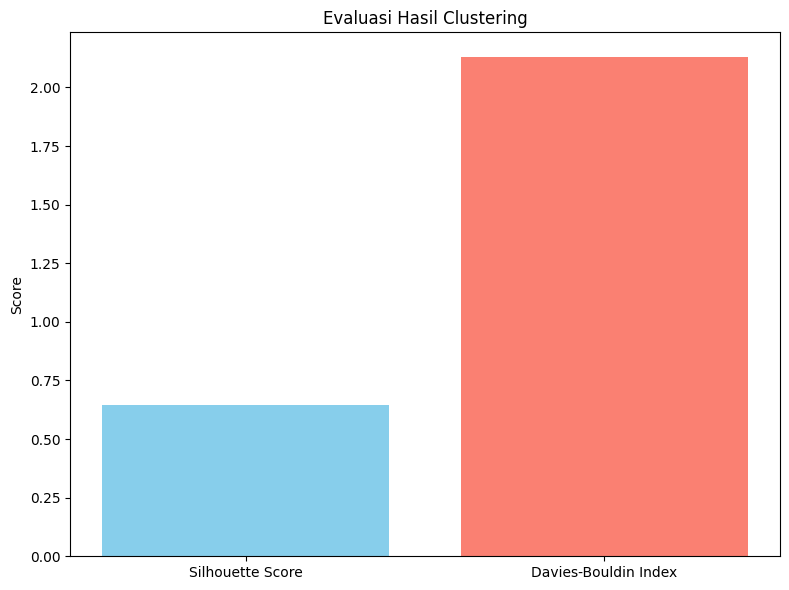

In [17]:
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

## Tugas

In [19]:
#@markdown ### Helper function
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None, label_names=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))

    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = sorted(list(set(labels)))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        legend_label = None
        if label_names is not None:
            if k >= 0 and k < len(label_names):
                legend_label = label_names[k]
            elif k == -1:
                legend_label = "Noise"

        class_mask = (labels == k)
        if k == -1:
            col = [0, 0, 0, 1]  # Warna hitam untuk noise
            marker = "x"
            sizes = 16
        else:
            marker = "o"
            sizes = (1 + 5 * probabilities[class_mask])**2

        ax.scatter(
            X[class_mask, 0],
            X[class_mask, 1],
            marker=marker,
            facecolor=tuple(col),
            edgecolor="k",
            s=sizes,
            label=legend_label
        )

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"

    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"

    ax.set_title(title)

    if any(ax.get_legend_handles_labels()[1]):
        ax.legend()

    plt.tight_layout()

### 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [20]:
try:
  import hdbscan
except ImportError:
  !pip install -q hdbscan
  import hdbscan

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

### 2. Lakukan clustering dengan HDBSCAN.

In [21]:
clusterer = hdbscan.HDBSCAN().fit(X)
hdbscan_labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

Jumlah cluster terbentuk: 2
Jumlah noise: 0


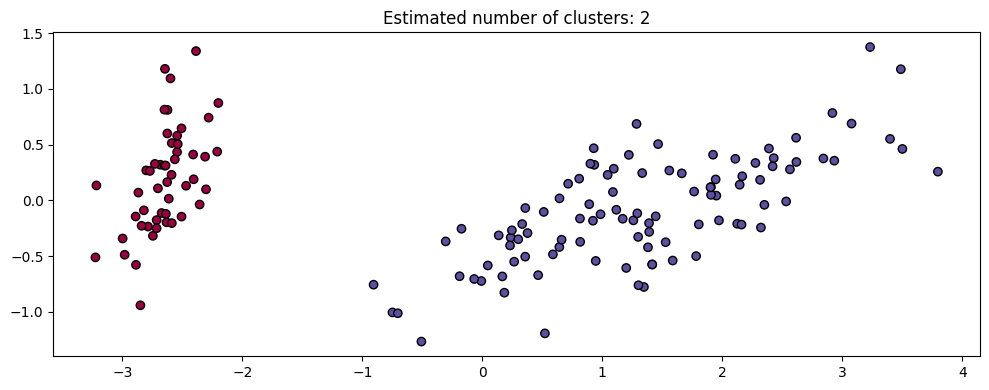

In [22]:
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = np.sum(hdbscan_labels == -1)
print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot(X_pca, hdbscan_labels)

### 4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

Berdasarkan visualisasi:
- HDBSCAN mengidentifikasi 2 kluster, sementara dataset asli memiliki 3 kelas. Hal ini menunjukkan bahwa HDBSCAN tidak sepenuhnya memisahkan semua spesies yang berbeda dalam dataset Iris.
- HDBSCAN secara kasar sesuai dengan spesies `setosa`, yang terpisah dengan baik dalam visualisasi PCA. Kluster HDBSCAN lainnya tampak bergabung dengan spesies `versicolor` dan `virginica`.

#### Kesimpulan:
Hasil klustering HDBSCAN tidak sepenuhnya sesuai dengan label asli dataset `iris`

#### Perbandingan visualisasi:

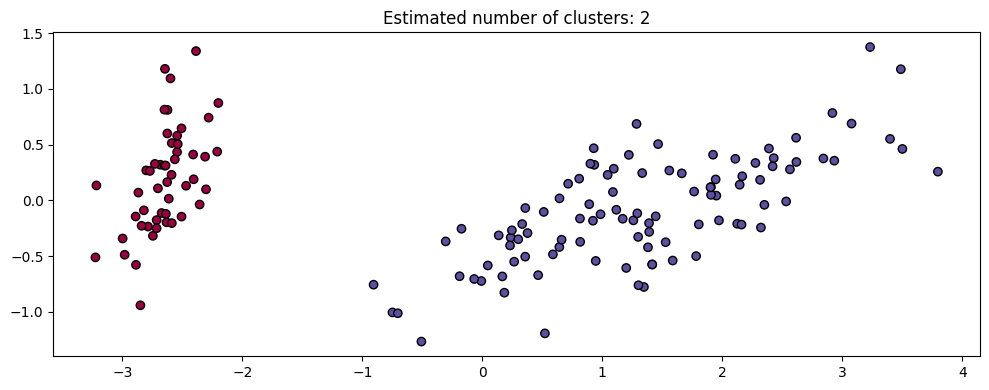

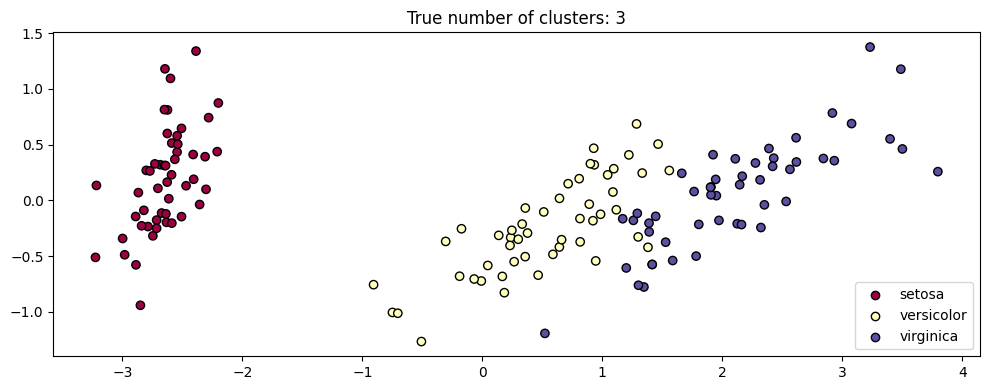

In [23]:
plot(X_pca, hdbscan_labels)
plot(X_pca, iris.target, ground_truth=True, label_names=iris.target_names)